In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
cdf=pd.read_csv('/content/drive/MyDrive/BTP/Univariate and DCC(with dates).csv')
cdf['Date'] = pd.to_datetime(cdf['Date'], format='%d/%m/%y')

In [4]:
import pandas as pd
from datetime import datetime

# Sample DataFrame with a 'date_column' containing date strings in the format '%d/%m/%y'
data = {
    'date_column': ['15/06/21', '25/08/20', '10/12/19', '05/04/18']
}

df = pd.DataFrame(data)

# Function to extract year in '%y' format from date string
def extract_year(date_string):
    date_object = datetime.strptime(date_string, '%d/%m/%y')
    return date_object.strftime('%y')

# Applying the function to the entire 'date_column' in the DataFrame
cdf['year_column'] = cdf['Date'].apply(extract_year)

print(cdf)


TypeError: ignored

In [5]:
cdf

,Date,Broad TRI RETURNS,ER RETURNS,GP RETURNS,SR RETURNS,bondvsexchange,bondvsgold,bondvssensex,Uni-bond,Uni-exchange,Uni-gold,Uni-sensex
0,2006-04-04,-0.001320,0.000000,0.004221,0.006349,-0.081160,-0.017487,0.137169,0.002953,0.005137,0.011469,0.014165
1,2006-05-04,0.001234,0.001792,-0.002527,0.009313,-0.081259,-0.019261,0.134756,0.002860,0.004163,0.011134,0.013675
2,2006-07-04,0.001991,-0.001343,-0.004540,-0.013495,-0.079715,-0.020230,0.136538,0.002752,0.003692,0.010794,0.013345
3,2006-10-04,-0.000364,0.002462,0.015932,0.006289,-0.081783,-0.023100,0.128810,0.002686,0.003269,0.010520,0.013418
4,2006-12-04,-0.000059,0.004238,0.007050,-0.026660,-0.083266,-0.025994,0.127777,0.002576,0.003329,0.010951,0.012967
...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2023-03-24,0.000598,0.000959,0.010792,-0.006898,-0.158262,0.091915,0.102105,0.001689,0.004940,0.010929,0.008460
3198,2023-03-27,0.000981,0.001434,-0.027192,0.002201,-0.156800,0.092163,0.099956,0.001631,0.004080,0.010912,0.008442
3199,2023-03-28,-0.000659,-0.001811,0.008773,-0.000696,-0.153807,0.076796,0.101116,0.001589,0.003566,0.012729,0.008160
3200,2023-03-29,0.000867,0.001866,0.002336,0.005994,-0.149746,0.071813,0.102202,0.001555,0.003281,0.012483,0.007889


In [6]:
bond = cdf['Uni-bond'].copy()
exchange = cdf['Uni-exchange'].copy()
sensex=cdf['Uni-sensex'].copy()
gold=cdf['Uni-gold'].copy()
bond_vs_exchange=cdf['bondvsexchange'].copy()
bond_vs_gold=cdf['bondvsgold'].copy()
bond_vs_sensex=cdf['bondvssensex'].copy()


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have the data already loaded into a DataFrame called 'df'

# Create combinations of input features and target DataFrames
combinations = [
    ['Uni-bond', 'Uni-gold'],
    ['Uni-bond', 'Uni-exchange'],
    ['Uni-bond', 'Uni-sensex']
]

target_dfs = {
    'bondvsgold': cdf['bondvsgold'],
    'bondvsexchange': cdf['bondvsexchange'],
    'bondvssensex': cdf['bondvssensex']
}

results = {
    'Input Features': [],
    'Target Feature': [],
    'R-squared': [],
    'Coefficients': [],
    'Intercept': []
}

for combo, target_f in zip(combinations, target_dfs.items()):
    features = cdf[combo]
    target_name, target = target_f

    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    r2 = r2_score(target, predictions)
    coefficients = model.coef_
    intercept = model.intercept_

    results['Input Features'].append(str(combo))
    results['Target Feature'].append(target_name)
    results['R-squared'].append(r2)
    results['Coefficients'].append(coefficients)
    results['Intercept'].append(intercept)

results_df = pd.DataFrame(results)
print(results_df)


                 Input Features  Target Feature  R-squared  \
0      ['Uni-bond', 'Uni-gold']      bondvsgold   0.010850   
1  ['Uni-bond', 'Uni-exchange']  bondvsexchange   0.033916   
2    ['Uni-bond', 'Uni-sensex']    bondvssensex   0.031559   

                                Coefficients  Intercept  
0   [-3.693343542941919, 0.5962793990618708]  -0.025438  
1   [-1.2130272744169115, 5.489071371034439]  -0.115920  
2  [7.997397031156741, -0.39159686798459775]   0.114052  


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Create combinations of input features
combinations = [
    ['Uni-bond', 'Uni-gold']]

target_dfs = {
    'bondvsgold': cdf['bondvsgold']}

results = {
    'Date': [],
    'Combination': [],
    'R-squared': []
}


for combo, target_f in zip(combinations, target_dfs.items()):
    features = cdf[combo]
    target_name, target = target_f

    for i in range(199, len(cdf)):
        start_date = cdf['Date'].iloc[i - 199]
        end_date = cdf['Date'].iloc[i]

        window_features = features.iloc[i - 199 : i + 1]

        model = LinearRegression()
        model.fit(window_features,target.iloc[i - 199 : i + 1])

        predictions = model.predict(window_features)
        r2 = r2_score(target.iloc[i - 199 : i + 1], predictions)

        results['Date'].append(end_date)
        results['Combination'].append(str(combo))
        results['R-squared'].append(r2)

r2_time_series = pd.DataFrame(results)
print(r2_time_series)


           Date               Combination  R-squared
0    2007-01-22  ['Uni-bond', 'Uni-gold']   0.061622
1    2007-01-23  ['Uni-bond', 'Uni-gold']   0.059959
2    2007-01-24  ['Uni-bond', 'Uni-gold']   0.059063
3    2007-01-25  ['Uni-bond', 'Uni-gold']   0.058460
4    2007-01-29  ['Uni-bond', 'Uni-gold']   0.057410
...         ...                       ...        ...
2998 2023-03-24  ['Uni-bond', 'Uni-gold']   0.574125
2999 2023-03-27  ['Uni-bond', 'Uni-gold']   0.576487
3000 2023-03-28  ['Uni-bond', 'Uni-gold']   0.570650
3001 2023-03-29  ['Uni-bond', 'Uni-gold']   0.565051
3002 2023-03-31  ['Uni-bond', 'Uni-gold']   0.560639

[3003 rows x 3 columns]


In [90]:
#Rough
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Create combinations of input features
combinations = [
    ['Uni-bond', 'Uni-gold']]

target_dfs = {
    'bondvsgold': cdf['bondvsgold']}

results = {
    'Date': [],
    'Combination': [],
    'R-squared': []
}


for combo, target_f in zip(combinations, target_dfs.items()):
    features = cdf[combo]
    target_name, target = target_f

    for i in range(199, len(cdf)):
        start_date = cdf['Date'].iloc[i - 199]
        end_date = cdf['Date'].iloc[i]

        window_features = features.iloc[i - 199 : i + 1]

        model = LinearRegression()
        model.fit(window_features,target.iloc[i - 199 : i + 1])

        predictions = model.predict(window_features)
        r2 = r2_score(target.iloc[i - 199 : i + 1], predictions)

        results['Date'].append(end_date)
        results['Combination'].append(str(combo))
        results['R-squared'].append(r2)

r2_time_series = pd.DataFrame(results)
print(r2_time_series)


           Date               Combination  R-squared
0    2007-01-22  ['Uni-bond', 'Uni-gold']   0.061622
1    2007-01-23  ['Uni-bond', 'Uni-gold']   0.059959
2    2007-01-24  ['Uni-bond', 'Uni-gold']   0.059063
3    2007-01-25  ['Uni-bond', 'Uni-gold']   0.058460
4    2007-01-29  ['Uni-bond', 'Uni-gold']   0.057410
...         ...                       ...        ...
2998 2023-03-24  ['Uni-bond', 'Uni-gold']   0.574125
2999 2023-03-27  ['Uni-bond', 'Uni-gold']   0.576487
3000 2023-03-28  ['Uni-bond', 'Uni-gold']   0.570650
3001 2023-03-29  ['Uni-bond', 'Uni-gold']   0.565051
3002 2023-03-31  ['Uni-bond', 'Uni-gold']   0.560639

[3003 rows x 3 columns]


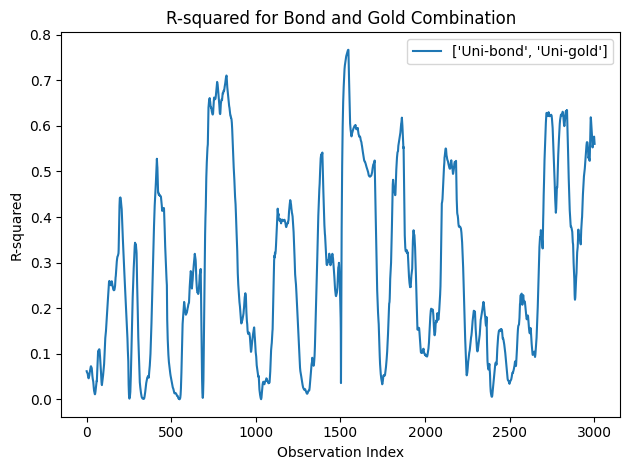

In [9]:
import matplotlib.pyplot as plt

# Assuming you've already created the r2_time_series DataFrame
dates = []
# Plotting R-squared values for each combination
for combo in r2_time_series['Combination'].unique():
    combo_data = r2_time_series[r2_time_series['Combination'] == combo]
    #combo_data = combo_data.set_index("Date")
    plt.plot(combo_data.index, combo_data['R-squared'], label=combo)
    # plt.plot(combo_data.Date, combo_data['R-squared'], label=combo)

plt.xlabel('Observation Index')
plt.ylabel('R-squared')
plt.title('R-squared for Bond and Gold Combination')
plt.legend()
plt.tight_layout()
plt.show()


##VAR MODEL


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Making dataset for VAR modelling
volatility = cdf[['Date', 'Uni-bond', 'Uni-exchange','Uni-gold','Uni-sensex']]
#volatility = volatility.set_index('Date')


In [27]:
volatility=volatility.drop('Date',axis=1)

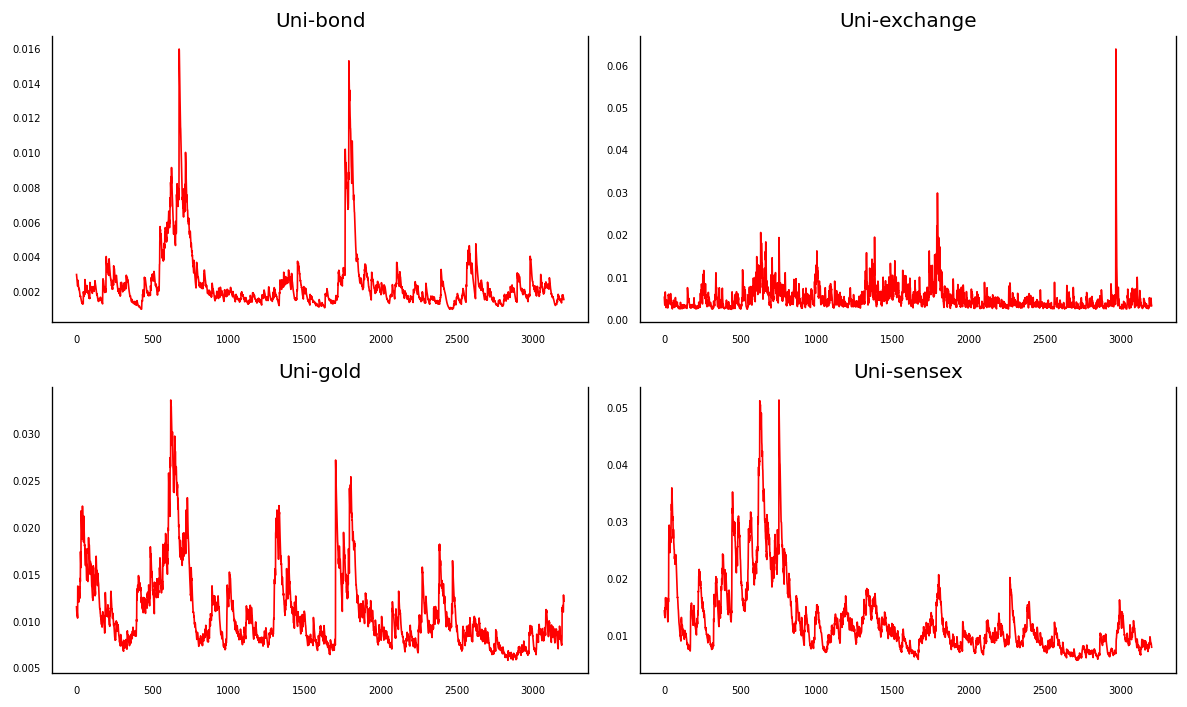

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = volatility[volatility.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(volatility.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [78]:
ad_fuller_result_1 = adfuller(volatility['Uni-bond'])#.diff()[1:])

print('Uni-bond')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(volatility['Uni-exchange'])#.diff()[1:])

print('Uni-exchange')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')
ad_fuller_result_3 = adfuller(volatility['Uni-gold'])#.diff()[1:])

print('Uni-gold')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(volatility['Uni-sensex'])#.diff()[1:])

print('Uni-Sensex')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Uni-bond
ADF Statistic: -3.949301794442664
p-value: 0.0017005306459832589

---------------------

Uni-exchange
ADF Statistic: -7.956100456880524
p-value: 3.0344630043722656e-12

---------------------

Uni-gold
ADF Statistic: -3.949301794442664
p-value: 0.0017005306459832589

---------------------

Uni-Sensex
ADF Statistic: -7.956100456880524
p-value: 3.0344630043722656e-12


In [79]:
print(volatility.shape)

(3202, 4)


In [80]:
train_df=volatility[:10]
test_df=volatility[10:20]

In [81]:
model = VAR(train_df)
results = model.fit(1)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Nov, 2023
Time:                     07:10:28
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -66.7578
Nobs:                     9.00000    HQIC:                  -68.1419
Log likelihood:           271.300    FPE:                1.15664e-29
AIC:                     -67.1961    Det(Omega_mle):     1.97540e-30
--------------------------------------------------------------------
Results for equation Uni-bond
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.001238         0.000453           -2.736           0.006
L1.Uni-bond             0.862142         0.092515            9.319           0.000
L1.Uni-exchange        -0.020985         0.018519

###COEFF MATRIX FORMULATION

In [223]:
coef_matrix = results.coefs
coef_matrix=coef_matrix.reshape(4, 4)
coef_df = pd.DataFrame(coef_matrix)
coef_df

,0,1,2,3
0,0.862142,-0.020985,0.088293,0.046685
1,-1.381823,0.298729,-0.334734,0.032938
2,0.447018,-0.410126,-0.155980,1.275768
3,-3.828902,0.451438,0.125366,-0.008708


In [224]:
#to others calculation

import numpy as np

def t(matrix):
  result = np.zeros_like(matrix)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if i != j:
        result[i,j] = matrix[i,j]
  result = np.sum(result, axis=1)
  return result


to_other = t(results.coefs)
to_others= pd.DataFrame(to_other)
coef_df=pd.concat([coef_df,to_others])
print(coef_df)

          0         1         2         3
0  0.862142 -0.020985  0.088293  0.046685
1 -1.381823  0.298729 -0.334734  0.032938
2  0.447018 -0.410126 -0.155980  1.275768
3 -3.828902  0.451438  0.125366 -0.008708
0 -4.763707  0.340041 -0.365348  1.299998


In [226]:
#from others calculation
def f(matrix):
  df = pd.DataFrame()
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      row_index=i
      col_index=j
      if(i==j):
       result=matrix.iloc[row_index,:].sum() - matrix.iloc[row_index, col_index]
       ele_entry=[result]
       #print(ele_entry)
       df = df.append(pd.Series(ele_entry), ignore_index=True)
  return df

from_other=f(coef_df.copy())

nan_row = pd.Series([np.nan])

from_other = from_other.append(nan_row, ignore_index=True)

#print(from_other)
from_other.index = ['Uni-bond', 'Uni-exchange', 'Uni-gold','Uni-sensex','To others']
from_other.columns = ['from_others']
print(from_other)


              from_others
Uni-bond         0.113992
Uni-exchange    -1.683619
Uni-gold         1.312660
Uni-sensex      -3.252097
To others             NaN


In [228]:
coef_df['From Others']=from_other['from_others'].values

In [230]:
# Change the column names
coef_df.columns = ['Uni-bond', 'Uni-exchange', 'Uni-gold','Uni-sensex','From Others']

# Change the row indices
coef_df.index = ['Uni-bond', 'Uni-exchange', 'Uni-gold','Uni-sensex','To Others']

In [231]:
coef_df

,Uni-bond,Uni-exchange,Uni-gold,Uni-sensex,From Others
Uni-bond,0.862142,-0.020985,0.088293,0.046685,0.113992
Uni-exchange,-1.381823,0.298729,-0.334734,0.032938,-1.683619
Uni-gold,0.447018,-0.410126,-0.155980,1.275768,1.312660
Uni-sensex,-3.828902,0.451438,0.125366,-0.008708,-3.252097
To Others,-4.763707,0.340041,-0.365348,1.299998,NaN
